In [64]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_city = pd.read_csv('D:\\Datasets\\New folder (3)\\city_attributes.csv')

In [3]:
df_humi = pd.read_csv('D:\\Datasets\\New folder (3)\\humidity.csv')
df_pressure = pd.read_csv('D:\\Datasets\\New folder (3)\\pressure.csv')
df_temperature = pd.read_csv('D:\\Datasets\\New folder (3)\\temperature.csv')
df_weather_description = pd.read_csv('D:\\Datasets\\New folder (3)\\weather_description.csv')
df_wind_direction = pd.read_csv('D:\\Datasets\\New folder (3)\\wind_direction.csv')
df_wind_speed = pd.read_csv('D:\\Datasets\\New folder (3)\\wind_speed.csv')

In [4]:
df_temperature.shape

(45253, 37)

In [5]:
df_city.columns

Index(['City', 'Country', 'Latitude', 'Longitude'], dtype='object')

In [6]:
df_humi.columns

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem'],
      dtype='object')

In [7]:
city = df_city['City'].unique()
latit = df_city['Latitude'].unique()
longi = df_city['Longitude'].unique()

In [8]:
df = pd.DataFrame(columns=['City','Latitude', 'Longitude', 'Humidity', 'Pressure',
                          'Temprature', 'Weather_description', 'Wind_direction', 'Wind_speed'])
df 

,City,Latitude,Longitude,Humidity,Pressure,Temprature,Weather_description,Wind_direction,Wind_speed


In [9]:
# df['DateTime'] = date_time

In [10]:
for cit, lat, lon in zip(city, latit, longi):
    df_temp =pd.DataFrame({'City': cit, 
                           'Latitude': lat,
                           'Longitude': lon, 
                           'Humidity' : df_humi[cit],
                          'Pressure' :df_pressure[cit], 
                           'Temprature' : df_temperature[cit], 
                           'Weather_description' : df_weather_description[cit],
                           'Wind_direction' : df_wind_direction[cit], 
                            'Wind_speed' : df_wind_speed[cit]})
    df = df.append(df_temp, ignore_index=True, )

In [11]:
df.head()

,City,Latitude,Longitude,Humidity,Pressure,Temprature,Weather_description,Wind_direction,Wind_speed
0,Vancouver,49.24966,-123.119339,NaN,NaN,NaN,NaN,NaN,NaN
1,Vancouver,49.24966,-123.119339,76.0,NaN,284.630000,mist,0.0,0.0
2,Vancouver,49.24966,-123.119339,76.0,NaN,284.629041,broken clouds,6.0,0.0
3,Vancouver,49.24966,-123.119339,76.0,NaN,284.626998,broken clouds,20.0,0.0
4,Vancouver,49.24966,-123.119339,77.0,NaN,284.624955,broken clouds,34.0,0.0


In [12]:
df.shape

(1629108, 9)

In [13]:
df_sample = df.sample(n=100000, random_state=0)

In [14]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1113634 to 297398
Data columns (total 9 columns):
City                   100000 non-null object
Latitude               100000 non-null float64
Longitude              100000 non-null float64
Humidity               98243 non-null float64
Pressure               98947 non-null float64
Temprature             99502 non-null float64
Weather_description    99505 non-null object
Wind_direction         99504 non-null float64
Wind_speed             99502 non-null float64
dtypes: float64(7), object(2)
memory usage: 7.6+ MB


In [15]:
df_sample['Weather_description'].nunique()

45

In [16]:
numeric = [col for col in df_sample.columns if df_sample[col].dtype != 'O']
numeric = numeric[2:]

In [17]:
df_sample[numeric].describe()

,Humidity,Pressure,Temprature,Wind_direction,Wind_speed
count,98243.000000,98947.000000,99502.000000,99504.000000,99502.000000
mean,68.161314,1016.479085,288.626239,182.898205,2.792989
std,22.371095,15.735795,10.357766,105.869556,2.098852
min,5.000000,800.000000,243.390000,0.000000,0.000000
25%,53.000000,1012.000000,281.975333,94.000000,1.000000
50%,71.000000,1017.000000,289.630000,190.000000,2.000000
75%,87.000000,1024.000000,296.260000,270.000000,4.000000
max,100.000000,1100.000000,320.440000,360.000000,41.000000


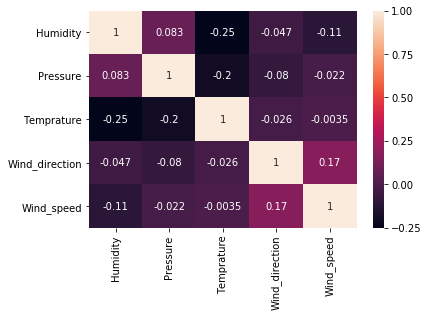

In [18]:
sns.heatmap(df_sample[numeric].corr(), annot=True)

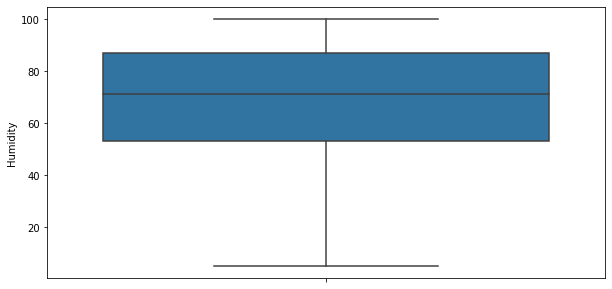

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Humidity', data=df_sample)

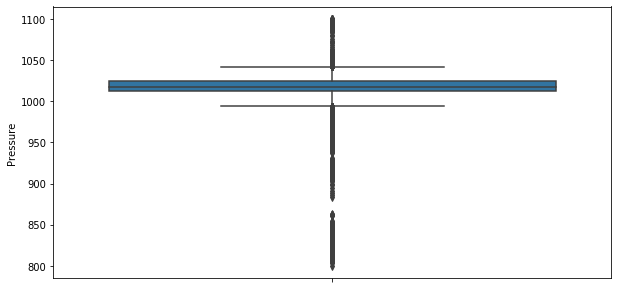

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Pressure', data=df_sample)

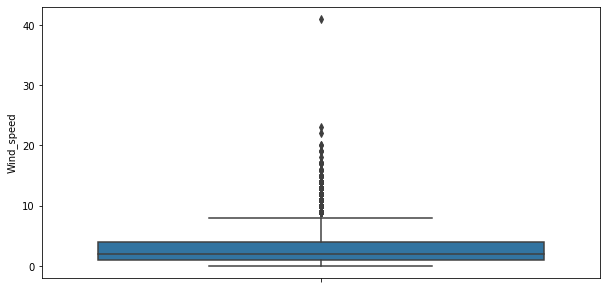

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Wind_speed', data=df_sample)

In [22]:
out = ['Wind_speed', 'Pressure']
rang = {}
for i in out:
    q1 = df_sample[i].quantile(q = 0.25)
    q3 = df_sample[i].quantile(q = 0.75)
    iqr = q3-q1
    lower_fence = q1-iqr*1.5
    upper_fence = q3+iqr*1.5
    rang[i] = {'lower_fence' : lower_fence, 'upper_fence' : upper_fence}
df_out = pd.DataFrame(rang).T

In [23]:
df_out

,lower_fence,upper_fence
Wind_speed,-3.5,8.5
Pressure,994.0,1042.0


In [24]:
df_sample['Pressure'] = np.where(df_sample['Pressure'] < df_out.loc['Pressure']['lower_fence'], df_out.loc['Pressure']['lower_fence'], df_sample['Pressure'])
df_sample['Pressure'] = np.where(df_sample['Pressure'] > df_out.loc['Pressure']['upper_fence'], df_out.loc['Pressure']['upper_fence'], df_sample['Pressure'])

df_sample['Wind_speed'] = np.where(df_sample['Wind_speed'] > df_out.loc['Wind_speed']['upper_fence'], df_out.loc['Wind_speed']['upper_fence'], df_sample['Wind_speed'])

In [25]:
df_sample[numeric].describe()

,Humidity,Pressure,Temprature,Wind_direction,Wind_speed
count,98243.000000,98947.000000,99502.000000,99504.000000,99502.000000
mean,68.161314,1017.481389,288.626239,182.898205,2.764356
std,22.371095,10.049943,10.357766,105.869556,1.992689
min,5.000000,994.000000,243.390000,0.000000,0.000000
25%,53.000000,1012.000000,281.975333,94.000000,1.000000
50%,71.000000,1017.000000,289.630000,190.000000,2.000000
75%,87.000000,1024.000000,296.260000,270.000000,4.000000
max,100.000000,1042.000000,320.440000,360.000000,8.500000


In [26]:
df_sample.isnull().sum()

City                      0
Latitude                  0
Longitude                 0
Humidity               1757
Pressure               1053
Temprature              498
Weather_description     495
Wind_direction          496
Wind_speed              498
dtype: int64

C:\Users\Sunny\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Sunny\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Frequency distribution of Humidity')

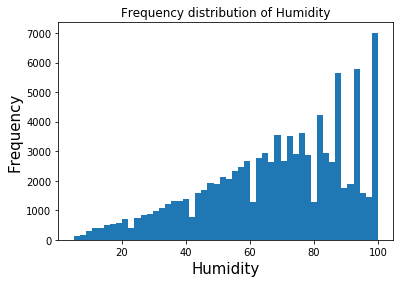

In [27]:
# df_sample['Humidity'].hist(bins=50)
plt.hist(df_sample['Humidity'], bins=50)
plt.xlabel('Humidity', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Frequency distribution of Humidity')

Text(0.5, 1.0, 'Frequency distribution of Temprature')

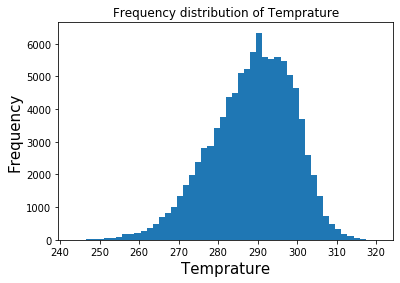

In [28]:
plt.hist(df_sample['Temprature'], bins=50)
plt.xlabel('Temprature', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Frequency distribution of Temprature')

Text(0.5, 1.0, 'Frequency distribution of Pressure')

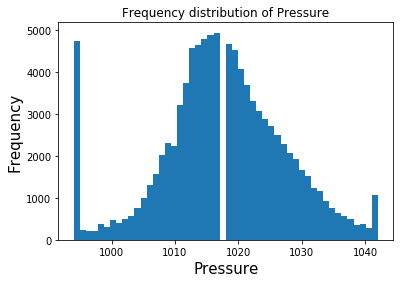

In [29]:
plt.hist(df_sample['Pressure'], bins=50)
plt.xlabel('Pressure', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Frequency distribution of Pressure')

Text(0.5, 1.0, 'Frequency distribution of Wind_direction')

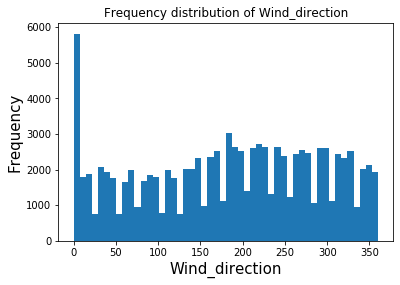

In [30]:
plt.hist(df_sample['Wind_direction'], bins=50)
plt.xlabel('Wind_direction', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Frequency distribution of Wind_direction')

Text(0.5, 1.0, 'Frequency distribution of Wind_speed')

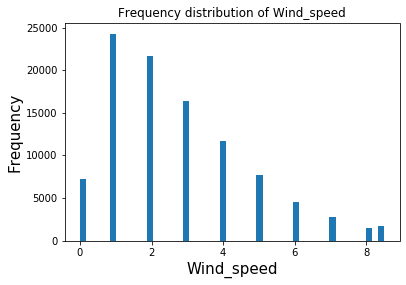

In [31]:
plt.hist(df_sample['Wind_speed'], bins=50)
plt.xlabel('Wind_speed', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Frequency distribution of Wind_speed')

In [32]:
for i in numeric:
    median = df_sample[i].median()
    df_sample[i].fillna(value=median, inplace=True, )

In [33]:
df_sample.isnull().sum()

City                     0
Latitude                 0
Longitude                0
Humidity                 0
Pressure                 0
Temprature               0
Weather_description    495
Wind_direction           0
Wind_speed               0
dtype: int64

In [34]:
df_sample['Weather_description'].dtype

dtype('O')

In [35]:
df_sample['Weather_description'].fillna(df_sample['Weather_description'].mode()[0], inplace=True)

In [36]:
df_sample.isnull().sum()

City                   0
Latitude               0
Longitude              0
Humidity               0
Pressure               0
Temprature             0
Weather_description    0
Wind_direction         0
Wind_speed             0
dtype: int64

In [37]:
# plt.figure(figsize=(9,16))
# plt.barh(df_sample['Weather_description'], width=0.2)

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

In [40]:
df_sample['Weather_description'] = le.fit_transform(df_sample['Weather_description'])

In [41]:
df_sample.head()

,City,Latitude,Longitude,Humidity,Pressure,Temprature,Weather_description,Wind_direction,Wind_speed
1113634,Pittsburgh,40.440620,-79.995888,39.0,1020.0,274.920911,0,200.0,4.0
522706,Dallas,32.783058,-96.806671,33.0,1016.0,311.101042,31,198.0,3.0
670879,Minneapolis,44.979969,-93.263840,77.0,1019.0,256.900000,34,290.0,7.0
1147447,Toronto,43.700111,-79.416298,94.0,1018.0,291.660000,20,0.0,1.0
272047,Las Vegas,36.174969,-115.137222,31.0,1007.0,290.760000,34,200.0,7.0


In [42]:
x = df_sample.iloc[:,3:]

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
ss = StandardScaler()

In [45]:
x = ss.fit_transform(x)

In [46]:
# from sklearn.decomposition import PCA
# x = PCA(n_components=2).fit_transform(x)

In [47]:
from sklearn.cluster import DBSCAN

In [48]:
db = DBSCAN(eps=0.65, min_samples=10)

In [49]:
db.fit(x)

DBSCAN(algorithm='auto', eps=0.65, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [50]:
# db.fit_predict(x)

In [51]:
len(np.unique(db.labels_))

18

In [52]:
np.unique(db.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16], dtype=int64),
 array([ 6296, 93543,     5,    23,    16,    11,    14,    10,    15,
           10,    10,     4,    10,     6,     3,     7,     8,     9],
       dtype=int64))

In [53]:
import plotly

C:\Users\Sunny\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning:

invalid value encountered in sqrt



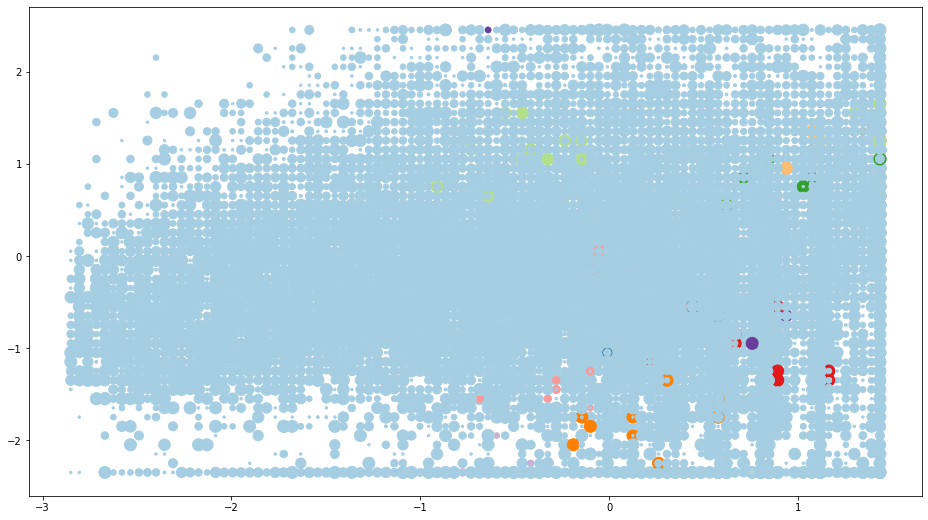

In [54]:
plt.figure(figsize=(16,9))
plt.scatter(x = x[:,0], y = x[:,1], s=x[:,-1]*50
            , c= db.labels_, cmap='Paired')

In [55]:
df_sample['class'] = db.labels_

In [56]:
df_sample.head()

,City,Latitude,Longitude,Humidity,Pressure,Temprature,Weather_description,Wind_direction,Wind_speed,class
1113634,Pittsburgh,40.440620,-79.995888,39.0,1020.0,274.920911,0,200.0,4.0,0
522706,Dallas,32.783058,-96.806671,33.0,1016.0,311.101042,31,198.0,3.0,0
670879,Minneapolis,44.979969,-93.263840,77.0,1019.0,256.900000,34,290.0,7.0,-1
1147447,Toronto,43.700111,-79.416298,94.0,1018.0,291.660000,20,0.0,1.0,0
272047,Las Vegas,36.174969,-115.137222,31.0,1007.0,290.760000,34,200.0,7.0,0


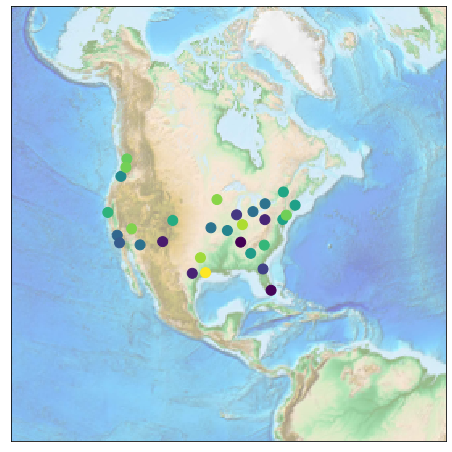

In [57]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(8,8))
map = Basemap(projection='laea', resolution=None, lat_0=40,  lon_0=-90, width=10E6, height=10E6)
map.etopo(scale=0.2, alpha = 0.5)
lon, lat = map(longi, latit)
# map.scatter(lat, lon)
# map.scatter(lon, lat, s=100,  c = np.random.random(len(latit)))
for lo, la, 
plt.scatter(lon, lat, s=100,  c = np.random.random(len(latit)))

<img src='http://www.satsig.net/world105.gif'/>

In [58]:
import matplotlib.cm as cm

In [59]:
n_cluster = max(db.labels_)+1
color = cm.rainbow(np.linspace(0,1,n_cluster))
cluster_labels = list(range(n_cluster))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

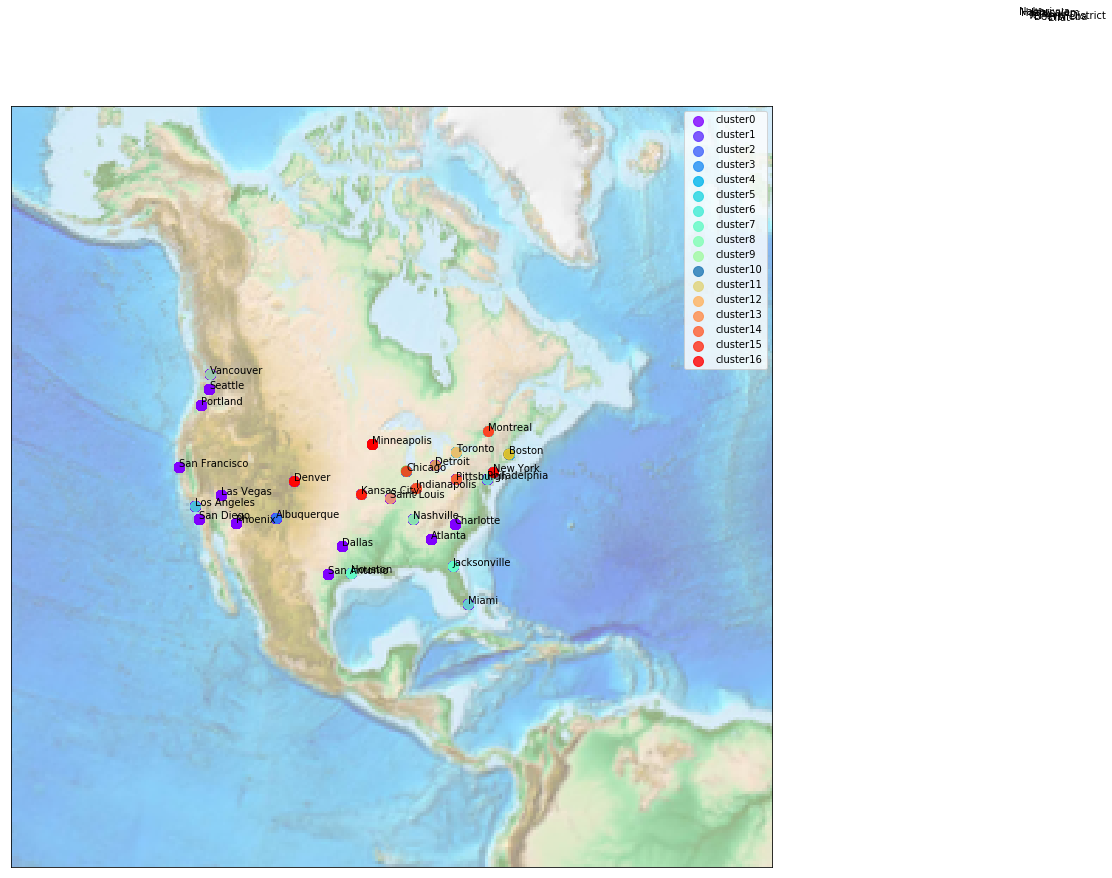

In [79]:
n_cluster = max(db.labels_)+1
color = cm.rainbow(np.linspace(0,1,n_cluster))
cluster_labels = list(range(n_cluster))

fig = plt.figure(figsize=(16,14))

map = Basemap(projection='lcc', resolution=None, lat_0=40,  lon_0=-90, width=10E6, height=10E6)
map.etopo(scale=0.2, alpha = 0.5)

for color, label in zip(color, cluster_labels):
    subset = df_sample[df_sample['class'] == label]
    lon, lat = map(np.array(subset['Longitude']), np.array(subset['Latitude']))
    plt.scatter(lon, lat, c=color, s=100, alpha=0.8,
                label='cluster'+str(label))
for lat, lon, ci in zip(latit, longi, city):
    lo, l = map(lon, lat)
    plt.text(lo,l,ci, withdash=True)
    plt.legend()

In [ ]:
for 